### Universidade Federal do Rio Grande - FURG

### Escola de Engenharia - EE

### Programa de Pós-graduação em Engenharia Oceânica - PPGEO

### Disciplina: Confiabilidade em Engenharia

### Professor: Dr. Mauro de Vasconcellos Real

# __Aula 06__

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import binom
from scipy.stats import poisson
import scipy.special as sp
from scipy.stats import beta
from scipy.optimize import fsolve

# __Capítulo 3 - Modelos analíticos para fenômenos aleatórios__

## __3.2 - Principais distribuições de probabilidade__ <a name="section_32"></a>

[3.2.1 - Distribuição Normal](#section_321)  
[3.2.2 - Distribuição Lognormal](#section_322)    
[3.2.3 - Distribuição Binomial (Sequência de Bernoulli)](#section_323)  
[3.2.4 - Distribuição Geométrica](#section_324)   
[3.2.5 - Distribuição Binomial Negativa](#section_325)  
[3.2.6 - Distribuição de Poisson](#section_326)  
[3.2.7 - Distribuição Exponencial](#section_327)   
[3.2.8 - Distribuição Gama](#section_328)  
[3.2.9 - Distribuição Hipergeometrica](#section_329)   
[3.2.10 - Distribuição Beta](#section_3210)   

### 3.2.1 - Distribuição Normal  <a name="section_321"></a>

* Também chamada de __Curva de Gauss__.

* É a mais utilizada das distribuições.

* Parâmetros: $\mu$ = média e $\sigma$ = desvio padrão.

* Sua FDP é dada por $N(\mu,\sigma)$:

$$ f_X(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right]} \qquad -\infty < x < +\infty$$

* A figura abaixo mostra os efeitos da variação dos parâmetros $\sigma$ (a) e $\mu$ (b) sobre a FDP da distribuição normal.


<img src="./images3/normal1.jpg" alta="Distribuição Normal: variação de sigma e de mu" style="width:800px"/>

Fonte: ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.

#### Distribuição normal padrão:

A distribuição normal pode ser padronizada através da utilização da variável $S$:

$$ s = \frac{(x-\mu)}{\sigma} $$.

A variável $S$ é uma variável aleatória de média $\mu_S = 0$ e de variância unitária $\sigma_S^2 = 1$, cuja FDP é dada na forma:

$$ f_X(x) = \frac{1}{\sqrt{2 \pi}} \exp{\left[-\frac{1}{2} s^2\right]} \qquad -\infty < x < +\infty$$

A figura abaixo mostra um gráfico da função densidade de probabilidade da distribuição normal padronizada, onde $\Phi(s) = F_S(s)$:

<img src="./images3/normal_padronizada.jpg" alta="Distribuição Normal Padronizada" style="width:474px"/>

Fonte: Adaptada de ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.

Em função do número de desvios padrões $\sigma$ considerados à esquerda e à direita da média $\mu = 0$, tem-se uma probabilidade (área sob a curva normal) de os dados estarem contidos neste intervalo, conforme é mostrado na figura abaixo.

<img src="./images3/normal_sigma.jpg" alta="Área sob a curva normal" style="width:474px"/>

Fonte: Adaptada de ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.

#### Cálculo de probabilidades

A probabilidade o evento $a \leq X \leq b$ será dada por:

$$ P(a \leq X \leq b) = \frac{1}{\sigma \sqrt{2 \pi}} \int_{a}^{b}\exp{\left[-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right]}dx$$

Esta integral representa a área sob a curva normal entre os pontos $x = a$ e $x = b$, conforme mostrado na figura abaixo.

Esta integral não possui solução analítica, devendo se valor ser obtido através da utilização de métodos numéricos ou alguma aproximação. Tabelas para a função de distribuição acumulada (FDA) da distribuição normal padronizada costumam estar disponíveis nos apêndices de livros de Estatística e Probabilidade.

<img src="./images3/normal_area.jpg" alta="Área sob a curva normal entre os pontos a e b" style="width:474px"/>

Fonte: Adaptada de ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.

Usando-se a distribuição  normal padrão, tem-se que:

$$ s_a = \frac{a - \mu}{\sigma} \quad \text{e} \quad s_b = \frac{b - \mu}{\sigma}$$

Logo:

$$ P(a \leq X \leq b) = \Phi\left(\frac{b - \mu}{\sigma}\right) - \Phi\left(\frac{a - \mu}{\sigma}\right)$$


#### Exemplo 3.5 - Precipitação pluviométrica em uma bacia de captação

A precipitação pluviométrica anual em uma bacia de captação é estimada ter uma distribuição normal com $N(1500 mm, 375mm)$.  
a) Qual a probabilidade de que em um ano futuro a precipitação anual será entre $1000 mm$ e $1800 mm$?

__Solução__:

$$P(1000 \leq X \leq 1800) = \Phi\left(\frac{1800 - 1500}{375}\right) - \Phi\left(\frac{1000 - 1500}{375}\right) = 0,7881 - 0,0912 = 0,6969 = 69,69\%$$

In [24]:
# Dados de entrada:
x_mean = 1500 # mm
x_std = 375 # mm
a = 1000 # mm
b = 1800 # mm
pa = norm.cdf(a, x_mean, x_std)
pb = norm.cdf(b, x_mean, x_std) 
px = pb - pa
print("Probabilidade acumulada de a = {0:0.4f}".format(pa))
print("Probabilidade acumulada de b = {0:0.4f}".format(pb))
print("Probabilidade do evento 1000 mm < X < 1800 mm = {0:0.4f}".format(px))

Probabilidade acumulada de a = 0.0912
Probabilidade acumulada de b = 0.7881
Probabilidade do evento 1000 mm < X < 1800 mm = 0.6969


b) Qual a probabilidade de que a precipitação anual será de pelo menos $750 mm$?

$$P(X \geq 750) = 1 - P(X < 750) =1 - \Phi\left(\frac{750 - 1500}{375}\right) = 1 - 0,02275 = 0,9772 = 97,72\%$$

In [25]:
p750 = norm.cdf(750, x_mean, x_std)
pxge750 = 1 - p750
print("Probabilidade acumulada de X < 750 mm = {0:0.4f}".format(p750))
print("Probabilidade do evento X >= 750 mm = {0:0.4f}".format(pxge750))

Probabilidade acumulada de X < 750 mm = 0.0228
Probabilidade do evento X >= 750 mm = 0.9772


c) Qual a precipitação anual que tem uma probabilidade de ocorrência de pelo menos 10%?

$$ P(X \leq x) = 10\% \rightarrow \Phi \left(\frac{x - 1.500}{375} \right) = 0,10 \rightarrow \frac{x-1.500}{375}=-1,2816$$

$$ x = 1.500 - 1,2816 . 375 = 1.019 mm$$

In [26]:
s = norm.ppf(0.10,0.00,1.00)
x = x_mean + s * x_std
print("Variável normal padronizada s tal que P(S<s)=10% = {0:0.4f}".format(s))
print("Variavel normal x, tal que s = -1,2816 = {0:0.4f} mm".format(x))

Variável normal padronizada s tal que P(S<s)=10% = -1.2816
Variavel normal x, tal que s = -1,2816 = 1019.4182 mm


Ou, de forma direta:

In [27]:
x = norm.ppf(0.10, x_mean, x_std)
print("Variavel normal x, tal que P(X<x)=10% = {0:0.4f} mm".format(x))

Variavel normal x, tal que P(X<x)=10% = 1019.4182 mm


[Retornar à lista de distribuições de probabilidade](#section_32) 

### 3.2.2 - Distribuição Lognormal <a name="section_322"></a>

* Uma variável aleatória $X$ possui uma distribuição lognormal se o logaritmo neperiano $ln(X)$ possui distribuição normal.

* A distribuição lognormal é útil de ser empregada quando todos os valores da variável aleatória $X$ forem positivos $(X>0)$.

* Os parâmetros de uma distribuição lognormal são  $\lambda$ e $\zeta$, onde: 

* $\lambda = E[ln(x)]$, ou seja, a média do logarítmo neperiano de $X$.

* $\zeta = \sqrt{\{Var[ln(X)]\}}$, ou seja, o desvio padrão do logaritmo neperiano de $X$

* A FDP de uma variável aleatória lognormal $X$ será dada por:

$$ f_X(x) = \frac{1}{\sqrt{2 \pi}\zeta x } \exp{-\frac{1}{2}\left(\frac{ln(x) - \lambda}{\zeta}\right)^2} \qquad 0 < x < +\infty$$


A figura abaixo apresenta o aspecto da função FDP para uma variável aleatória lognormal, para diversos valores do parâmetro de dispersão $\zeta$.

<img src="./images3/lognormal.jpg" alt="FDP para uma variável aleatória lognormal." style="width:474px"/>

Fonte: ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.

#### Parâmentros da distribuição lognormal

Uma vez conhecidos os parâmetros média $\mu$ e desvio padrão $\sigma$ da variável $X$, os parâmetros da distribuição lognormal podem ser obtidos a partir das seguintes equações:

* a) Média $\lambda$:

$$ \lambda = ln\mu - \frac{1}{2}\zeta^2$$.

* b) Variância $\zeta$:

$$ \zeta^2 = ln\left( \frac{\sigma^2}{\mu^2} + 1 \right)$$

* c) Mediana $x_m$:

$$x_m = \frac{\mu}{\sqrt{1+\delta^2}}$$

* d) Nos casos em que:

$$ \delta = \frac{\sigma}{\mu} \le 0,30 \quad \rightarrow \quad \zeta \approxeq \delta $$

#### Exemplo 3.6 - Precipitação em uma bacia de captação: modelo com distribuição lognormal

A precipitação pluviométrica anual em uma bacia de captação possui média $\mu = 1.500 mm$ e desvio padrão $\sigma = 375 mm$. Considerar, agora, que o modelo de distribuição de probabilidade da precipitação anual seja lognormal.  
a) Qual a probabilidade de que em um ano futuro a precipitação anual será entre $1000 mm$ e $1800 mm$?

__Solução__:

Cálculo dos parâmetros da distribuição lognormal:

$$ \delta = \frac{375}{1.500} = 0,25 $$

$$ \zeta^2 = ln\left( \frac{\sigma^2}{\mu^2} + 1 \right) = ln\left( 0,25^2 + 1 \right) = 0,0606$$

$$ \zeta = \sqrt{0,0606}= 0,2462$$

Note-se que para $\delta < 0,30 \rightarrow \zeta \approxeq \delta$

$$ \lambda = ln\mu - \frac{1}{2}\zeta^2 = ln(1500) - \frac{1}{2}(0,2462)^2 = $$.

$$P(1000 \leq X \leq 1800) = \Phi\left(\frac{1800 - 1500}{375}\right) - \Phi\left(\frac{1000 - 1500}{375}\right) = 0,7881 - 0,0912 = 0,6969 = 69,69\%$$

In [28]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
# Cálculo das probabilidades utilizando a distribuição normal de ln(x)
sa = (np.log(1000.00)-lambdax)/zetax
sb = (np.log(1800.00)-lambdax)/zetax
pa = norm.cdf(sa, 0, 1)
pb = norm.cdf(sb, 0, 1)
px = pb - pa
print("Parâmetro lambda = {0:0.4f}".format(lambdax))
print("Parâmetro zeta = {0:0.4f}".format(zetax))
print("Probabilidade acumulada de a = {0:0.4f}".format(pa))
print("Probabilidade acumulada de b = {0:0.4f}".format(pb))
print("Probabilidade do evento 1000 mm < X < 1800 mm = {0:0.4f}".format(px))

Parâmetro lambda = 7.2829
Parâmetro zeta = 0.2462
Probabilidade acumulada de a = 0.0638
Probabilidade acumulada de b = 0.8061
Probabilidade do evento 1000 mm < X < 1800 mm = 0.7423


Ou usando diretamente a FDA da distribução lognormal:

In [29]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
# Parâmetros para scipy.stats lognorm.cdf
s = zetax
scale =  np.exp(lambdax)
loc= 0.00
# Cálculo das probabilidades utilizando diretamente a distribuição lognormal
a= 1000.00
b= 1800.00
pa = lognorm.cdf(a, s, loc, scale)
pb = lognorm.cdf(b, s, loc, scale)
px = pb - pa
print("Parâmetro lambda = {0:0.4f}".format(lambdax))
print("Parâmetro zeta = {0:0.4f}".format(zetax))
print("Parâmetro loc = {0:0.4f}".format(loc))
print("Parâmetro s = {0:0.4f}".format(zetax))
print("Parâmetro scale = {0:0.4f}".format(scale))
print("Probabilidade acumulada de a = {0:0.4f}".format(pa))
print("Probabilidade acumulada de b = {0:0.4f}".format(pb))
print("Probabilidade do evento 1000 mm < X < 1800 mm = {0:0.4f}".format(px))

Parâmetro lambda = 7.2829
Parâmetro zeta = 0.2462
Parâmetro loc = 0.0000
Parâmetro s = 0.2462
Parâmetro scale = 1455.2138
Probabilidade acumulada de a = 0.0638
Probabilidade acumulada de b = 0.8061
Probabilidade do evento 1000 mm < X < 1800 mm = 0.7423


b) Qual a probabilidade de que a precipitação anual será de pelo menos $750 mm$?

$$P(X \geq 750) = 1 - P(X < 750) =1 - \Phi\left(\frac{ln(750) - 7,2820}{0,2462}\right) = 1 - 0,0036 = 0,9964 = 99,64\%$$

In [30]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
# Cálculo das probabilidades utilizando a distribuição normal de ln(x)
s750 = (np.log(750)-lambdax)/zetax
p750 = norm.cdf(s750, 0, 1)
pxge750 = 1 - p750
print("Probabilidade acumulada de X < 750 mm = {0:0.4f}".format(p750))
print("Probabilidade do evento X >= 750 mm = {0:0.4f}".format(pxge750))

Probabilidade acumulada de X < 750 mm = 0.0036
Probabilidade do evento X >= 750 mm = 0.9964


Ou usando diretamente a FDA da distribução lognormal:

In [31]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
# Parâmetros para scipy.stats lognorm.cdf
s = zetax
scale =  np.exp(lambdax)
loc= 0.00
# Cálculo das probabilidades utilizando diretamente a distribuição lognormal
p750 = lognorm.cdf(750.00, s, loc, scale)
pxge750 = 1 - p750
print("Parâmetro lambda = {0:0.4f}".format(lambdax))
print("Parâmetro zeta = {0:0.4f}".format(zetax))
print("Parâmetro loc = {0:0.4f}".format(loc))
print("Parâmetro s = {0:0.4f}".format(zetax))
print("Parâmetro scale = {0:0.4f}".format(scale))
print("Probabilidade acumulada de X < 750 mm = {0:0.4f}".format(p750))
print("Probabilidade do evento X >= 750 mm = {0:0.4f}".format(pxge750))

Parâmetro lambda = 7.2829
Parâmetro zeta = 0.2462
Parâmetro loc = 0.0000
Parâmetro s = 0.2462
Parâmetro scale = 1455.2138
Probabilidade acumulada de X < 750 mm = 0.0036
Probabilidade do evento X >= 750 mm = 0.9964


c) Qual a precipitação anual que tem uma probabilidade de ocorrência de pelo menos 10%?

$$ P(X \leq x) = 10\% \rightarrow \Phi \left(\frac{ln(x_{10\%} - 7,2829}{0,2462} \right) = 0,10 \rightarrow \frac{ln(x)-7,2829}{0,2462}=-1,2816$$

$$ ln(x) = 7,2829 - 1,2816 . 0,2462 = 6,9674 $$

$$ x = \exp(6,9674) = 1.061,42 mm $$

In [32]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
s = norm.ppf(0.10,0.00,1.00)
lnx = lambdax + s * zetax
x = np.exp(lnx)
print("Variável normal padronizada s tal que P(S<s)=10% = {0:0.4f}".format(s))
print("ln(x) correspondente a s(10%) = {0:0.4f}".format(lnx))
print("Variavel normal x, tal que s = -1,2816 = {0:0.4f} mm".format(x))

Variável normal padronizada s tal que P(S<s)=10% = -1.2816
ln(x) correspondente a s(10%) = 6.9674
Variavel normal x, tal que s = -1,2816 = 1061.4207 mm


Ou, de forma direta:

In [33]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
# Parâmetros para scipy.stats lognorm.cdf
s = zetax
scale =  np.exp(lambdax)
loc= 0.00
# Cálculo de x
x = lognorm.ppf(0.10, s, loc, scale)
print("Variavel normal x, tal que P(X<x)=10% = {0:0.4f} mm".format(x))

Variavel normal x, tal que P(X<x)=10% = 1061.4207 mm


[Retornar à lista de distribuições de probabilidade](#section_32) 

### 3.2.3 - Distribuição Binomial (Sequência de Bernoulli)  <a name="section_323"></a>

#### Sequência de Bernoulli:

1. Cada tentaviva possui apenas dois resultados possíveis: a __ocorrência__ $(p)$ ou a __não-ocorrência__ $(q)$ do evento.

2. A probabilidade de ocorrência do evento em cada tentativa é __constante__.

3. As tentativas são __estatisticamente independentes__.

#### Distribuição Binomial:

* A probabilidade de acontecerem $x$ ocorrências, em $n$ tentativas, com uma probabilidade $p$ em cada tentativa é:

$$P(X=x) = \binom{n}{x} p^x (1-p)^{n-x} \qquad x = 0, 1, 2, 3, ..., n$$

Onde:

$$ \binom{n}{x} = \frac{n!}{x!(n-x)!} $$

É a combinação de $n$ elementos, $x$ a $x$.

* Na sequência de Bernoulli as tentativas devem ser discretas.

* Porém, problemas de tempo ou espaço contínuos podem ser resolvidos dividindo-se o tempo (ou o espaço) em intervalos finitos e admitindo-se apenas a ocorrência ou a não-ocorrência do evento em cada intervalo.

#### Exemplo 3.7 - Cheia máxima anual - Distribuição Binomial

No planejamento de um sistema de controle de enchentes é de interesse conhecer-se a ocorrência da máxima cheia anual de um  rio. A probabilidade de a cheia anual exceder um nível $h_0$ é de $0,10$, em um ano.

a)Qual a probabilidade de que o nível $h_0$ será excedido uma vez nos próximos cinco anos?

__Solução:__

$p = 0,10$  
$1 - p = 0,90$  
$n = 5$  
$x = 1$  

$$P(X=1) = \binom{5}{1} (0,1)^1(0,9)^4 = 0,3280=32,80\%$$



In [34]:
# Entrada de dados
n = 5
p = 0.10
x = 1
# Cálculo da probabilidade de que ocorra uma cheia em 5 anos
px1 = binom.pmf(x,n,p)
print("Probabilidade de X=1, em 5 anos = {0:0.4f}".format(px1))

Probabilidade de X=1, em 5 anos = 0.3280


b)Qual a probabilidade de que haverá no máximo uma cheia superior a $h_0$ nos próximos cinco anos?

__Solução:__

$$P(X \leq 1) = P(X=0) + P(X = 1) = \binom{5}{0} (0,1)^0(0,9)^5 + \binom{5}{1} (0,1)^1(0,9)^4 = 0,5905 + 0,3280 = 0,9185=91,85\%$$

Esta é a possibilidade de haver nenhuma ou apenas uma cheia em 5 anos.

In [35]:
# Entrada de dados
n = 5
p = 0.10
# Cálculo da probabilidade de que ocorra uma cheia em 5 anos
px0 = binom.pmf(0,n,p)
px1 = binom.pmf(1,n,p)
pxmax1 = px0 + px1 
print("P(X=0) = {0:0.4f}".format(px0))
print("P(X=1) = {0:0.4f}".format(px1))
print("Probabilidade de  X ser no máximo igual a 1, em 5 anos = {0:0.4f}".format(pxmax1))

P(X=0) = 0.5905
P(X=1) = 0.3280
Probabilidade de  X ser no máximo igual a 1, em 5 anos = 0.9185


A figura abaixo mostra o gráfico da distribuição binomial para os parâmetros $p = 0,10$ e $n = 5$, observando-se que: $C_n^x = \binom{n}{x}$, ou seja, combinação de $n$ elementos, $x$ a $x$.

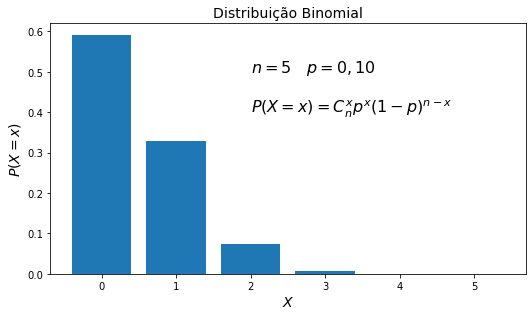

In [36]:
# Parâmetros n e p da distribuição binomial
n = 5
p = 0.10
# Definindo os valores de x
x_values = list(range(n + 1))
# Lista com os valores de pmf para cada valor de x
dist = [binom.pmf(x, n, p) for x in x_values ]
# Gerando o gráfico da distribuição binomial para n = 5 e p = 0,10
fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.bar(x_values, dist)
ax.set_ylabel(r'$P(X=x)$', fontsize=14)
ax.set_xlabel(r'$X$', fontsize=14)
ax.set_title('Distribuição Binomial', fontsize=14)
ax.text(2, 0.5, r'$ n = 5 \quad p = 0,10$', fontsize = 16)
ax.text(2, 0.4, r'$ P(X=x) = C_{n}^{x} p^x (1-p)^{n-x}$', fontsize = 16)
fig.tight_layout()

[Retornar à lista de distribuições de probabilidade](#section_32) 

### 3.2.4 - Distribuição Geométrica <a name="section_324"></a>

* Em uma seqüência de Bernoulli, o número de tentativas até que um evento especificado ocorra pela primeira vez é governado pela __Distribuição Geométrica__.

* O evento é realizado na _t-ésima_ tentativa:

$$P(T=t) = pq^{(t-1)} \qquad t = 1, 2, 3, ...$$

* O __período de retorno__ de um evento, ou tempo de recorrência médio, será dado por:

$$\bar{T} = E(T) = \sum_{t=1}^{\infty}tpq^{(t-1)} = p(1 + 2q + 3q^2 + ...)$$

* Para $q<1$, a série infinita conduz a:

$$\bar{T} = \frac{1}{p} $$

* __O período de retorno é o inverso da probabilidade de ocorrência do evento!__

O gráfico abaixo ilustra a convergência do valor esperado do tempo de retorno $E(T)$ para o inverso da probabilidade de ocorrência do evento $\frac{1}{p}$, com o crescimento do número de termos da série.


Período médio de retorno = 20.0


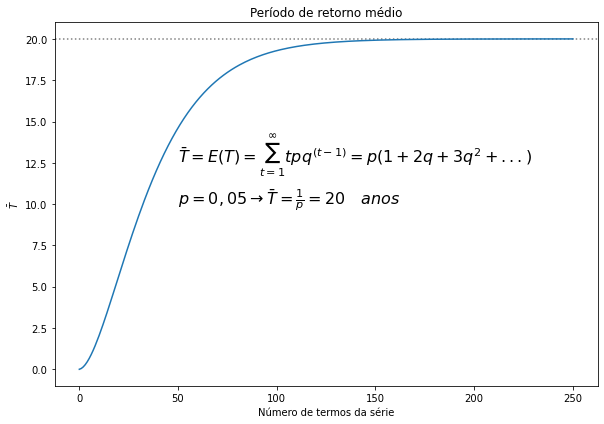

In [37]:
# Entrada de dados
n = 250
p = 0.05
q = 1 - p
esp_t = np.zeros(n+1)
soma = 0
# Cálculo do valor esperado do tempo de retorno
for t in range(1, n+1, 1):
    soma += t * q ** (t-1)
    esp_t[t] = p * soma
print("Período médio de retorno = {0:0.4}".format(esp_t[-1]))
# Gráfico de convergência da série
plt.figure(figsize=(8.5, 6))
plt.plot(esp_t)
plt.axhline(y=20, color="gray", linestyle=':', zorder=-1)
plt.text(50, 12.5, r'$ \bar{T} = E(T) = \sum_{t=1}^{\infty}tpq^{(t-1)} = p(1 + 2q + 3q^2 + ...)$', fontsize=16)
plt.text(50, 10, r'$ p = 0,05 \rightarrow \bar{T}= \frac{1}{p} = 20 \quad anos$', fontsize=16)
plt.xlabel("Número de termos da série")
plt.ylabel(r"$\bar{T}$")
plt.title("Período de retorno médio")
plt.tight_layout()
plt.show()

#### Exemplo 3.8 - Plataforma offshore

A plataforma offshore indicada na figura abaixo está construída $8m$ acima do nível do mar. A probabilidade de esta altura ser superada pelas ondas do mar em um ano é de $5\%$.  
Qual a probabilidade de as ondas cobrirem a plataforma em seu período de retorno?

<img src="./images3/plataforma.jpg" alt="Plataforma offshore" style="width:474px"/>

Fonte: ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.

__Solução:__

Cálculo do período de retorno:

$$ \bar{T} = \frac{1}{p} = \frac{1}{0,05} = 20 \quad \text{anos}$$

Cálculo da probabilidade da onda encobrir a plataforma no período de retorno:

A probabilidade de a plataforma não ser encoberta no período de um ano é $q = 1 - p = 1 - 0,05 = 0,95$.

$$P(H > 8m \quad \text{em 20 anos}) = 1 - (0,95)^{20} = 1 - 0,3585 = 0,6415$$

#### Probabilidade de ocorrência de um evento dentro do seu período de retorno:

$$P(nenhuma \quad ocorr\hat encia \quad em \quad \bar{T})=(1-p)^{\bar{T}}$$

Empregando a fórmula da expansão binomial:

$$(x+y)^n = \sum_{k=0}^{\infty} \binom{n}{k}x^{(n-k)}y^{k}$$

Resulta:

$$(1-p)^{\bar{T}} = \binom{\bar{T}}{0}1^{\bar{T}}p^0 +\binom{\bar{T}}{1}1^{(\bar{T}-1)}p^1 +\binom{\bar{T}}{2}1^{(\bar{T}-2)}p^2 +\binom{\bar{T}}{3}1^{(\bar{T}-3)}p^3 + ...$$

$$(1-p)^{\bar{T}} = 1 - p + \frac{\bar{T}!}{2!(\bar{T}-2)!}p^2 - \frac{\bar{T}!}{3!(\bar{T}-3)}p^3 + ...$$

Para valores grandes de $\bar{T}$ e pequenos de $p$, tem-se que:

$$(1-p)^{\bar{T}} = 1 - p + \frac{\bar{T}!}{2!(\bar{T}-2)!}p^2 - \frac{\bar{T}!}{3!(\bar{T}-3)}p^3 + ... = e^{-\bar{T}p}$$

Logo:

$$P(nenhuma \quad ocorr\hat encia \quad em \quad \bar{T})= (1-p)^{\bar{T}} \approxeq e^{(-\bar{T}p)} = e^{(-1)} = 0,3679$$

Então, a probabilidade de ocorrência de um evento dentro de seu período de retorno será dada por:

$$P(ocorr\hat encia \quad em \quad \bar{T})= 1 - 0,3679 = 0,6321 = 63,21\%$$

Ou seja, para um evento raro ($p$ pequeno), com o período de retorno longo ($\bar{T}$ grande), a probabilidade de ocorrência do evento em seu período de retorno tende para o valor $0,6321 = 63,21\%$.  
Isto é válido mesmo para um período de retorno de $20$ anos, como o do Exemplo 3.8, pois neste caso a diferença é de apenas $1,50\%$.  

Por isso, a norma brasileira NBR-6123:1988, "Forças devidas ao vento em edificações", em seu item 5.4 estabelece que:

>Segundo a definição de 5.1, a velocidade básica Vo é a velocidade do vento que apresenta um período de recorrência médio de 50 anos. A probabilidade de que a velocidade Vo seja igualada ou excedida neste período é de 63%.


[Retornar à lista de distribuições de probabilidade](#section_32) 

### 3.2.5 - Distribuição Binomial Negativa <a name="section_325"></a>

* O __número de tentativas__ de Bernoulli necessárias  até a __k-ésima__ ocorrência de um evento é governado pela __Distribuição Binomial Negativa__.

$$ P(T_k = t) = \binom{t-1}{k-1} p^k q^{t-k} \qquad para \quad t = k, k+1, ...$$

$$ P(T_k = t) = 0 \qquad para \quad t<k$$



#### Exemplo 3.9 - Velocidade máxima do vento

Uma torre de transmissão foi projetada para uma velocidade máxima de vento que ocorre 1 vez a cada 50 anos.  
Qual a probabilidade desta velocidade ser excedida duas vezes nos primeiros 5 anos após a execução da estrutura?

__Solução:__

* A probabilidade de ocorrência de um vento de 50 anos é:

$$ p = \frac{1}{\bar{T}} = \frac{1}{50} = 0,02 $$

* A probabilidade de que serão gastas 5 tentativas para obter-se 2 ocorrências é:

$$ P(T_2 = 5) = \binom{4}{1}(0,02)^2(0,98)^3 = 0,0015 = 0,15\%$$


[Retornar à lista de distribuições de probabilidade](#section_32) 

### 3.2.6 - Distribuição de Poisson <a name="section_326"></a>

* A distribuição de Poisson descreve a FMP do número de eventos que ocorrem em determinado intervalo (contínuo) de tempo ou de espaço.

* É o resultado de um __processo de contagem__ $X(t)$ no tempo (ou espaço) __contínuo__ chamado  __Processo de Poisson__.

#### Processo de Poisson:

1. Em um instante de tempo qualquer, pode haver no máximo uma ocorrência de um evento.

2. As ocorrências de um evento em intervalos de tempo não sobrepostos são estatisticamente independentes. 

3. A probabilidade de uma ocorrência em $(t, t + \Delta t)$ é proporcional a $\Delta t$, isto é:

$$P\left[X(\Delta t) = 1 \right] = \nu \Delta t$$

Onde $\nu$ é uma constante de proporcionalidade positiva.

#### Função densidade de probabilidade:

$$p_x(t) = \frac{(\nu t)^x}{x!} e^{-\nu t} \qquad x = 0,1,2,3,...$$


#### Valor esperado:

$$ E(X_t) = \nu t$$

#### Variância: 

$$Var(X_t) = E \left( X_t^2 \right) - \left[E(X_t) \right]^2 = \nu t $$









### Exemplo 3.10 - Tempestades no mar

<img src="./images3/tempestade.jpg" alt="Tempestades no mar" style="width:474px"/>

Fonte: https://ite-prod-cdn-end.azureedge.net/sharedmedia/breakbulk/media/assets/oil-rig-storm_1.png

Em média ocorrem 4 tempestades por ano.
A ocorrência de tempestades no mar pode ser representada um Processo de Poisson.
a) Qual a probabilidade de não haver tempestades no próximo ano?

__Solução:__


$$P(X_t = 0) = \frac{(4)^0}{0!} e^{-4} = 0,0183=1,83\%$$

b) Qual a probabilidade de ocorrerem exatamente 4 tempestades no próximo ano?

$$P(X_t = 4) = \frac{(4)^4}{4!} e^{-4} = 0,1954=19,54\%$$

c) A probabilidade de haver 2 ou mais tempestades no próximo ano?

$$P(X_t \geq 2) = \sum_{X=2}^{\infty} \frac{(4)^x}{x!} e^{-4} = 1 - \sum_{X=0}^{1} \frac{(4)^x}{x!} e^{-4} = 1 - 0,0183 - 0,0733 = 0,9084 = 90,84\%$$

A FMP do número de tempestades no mar em 1 anos é mostrada na figura abaixo.

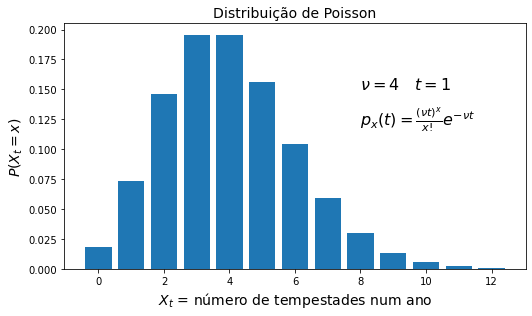

In [38]:
# Parâmetros n e p da distribuição de Poisson
nu = 4
t = 1
# Definindo os valores de x
x_values = list(range(13))
# Lista com os valores de pmf para cada valor de x
dist = [poisson.pmf(x, nu) for x in x_values ]
# Gerando o gráfico da distribuição binomial para n = 5 e p = 0,10
fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.bar(x_values, dist)
ax.set_ylabel(r'$P(X_t=x)$', fontsize=14)
ax.set_xlabel(r'$X_t$ = número de tempestades num ano', fontsize=14)
ax.set_title('Distribuição de Poisson', fontsize=14)
ax.text(8, 0.15, r'$ \nu = 4 \quad t = 1$', fontsize = 16)
ax.text(8, 0.12, r'$ p_x(t) = \frac{(\nu t)^x}{x!} e^{-\nu t} $', fontsize = 16)
fig.tight_layout()

Cálculo usando uma rotina em Python:

In [39]:
# Parâmetros n e p da distribuição de Poisson
nu = 4
t = 1
# Definindo os valores de px
px0 = poisson.pmf(0, nu)
px1 = poisson.pmf(1, nu)
px_ge_2 = 1 - px0 - px1
print("P(X=0) = {0:0.4f}".format(px0))
print("P(X=1) = {0:0.4f}".format(px1))
print("Probabilidade de  X maior ou igual a 2 no próximo ano = {0:0.4f}".format(px_ge_2))

P(X=0) = 0.0183
P(X=1) = 0.0733
Probabilidade de  X maior ou igual a 2 no próximo ano = 0.9084


Alternativamente, usando a DPA da Distribuição de Poisson:

In [40]:
px_ge_2 = 1 - poisson.cdf(1, nu)
print("Probabilidade de  X maior ou igual a 2 no próximo ano = {0:0.4f}".format(px_ge_2))

Probabilidade de  X maior ou igual a 2 no próximo ano = 0.9084


[Retornar à lista de distribuições de probabilidade](#section_32) 

### 3.2.7 - Distribuição Exponencial <a name="section_327"></a>

* Processo de Poisson: o tempo até a ocorrência do primeiro evento $(T_1)$ segue uma __distribuição exponencial__.

$$ P(T_1 > t) = P(X_t = 0) = \frac{\nu t^0}{0!}e^{-\nu t} = e^{-\nu t} $$

* Como as ocorrências em intervalos não sobrepostos são independentes, o valor de $T_1$ é igual ao __Tempo de Recorrência__.

#### Função densidade de probabilidade acumulada:

$$ F_{T_1}(t) = P(T_1 \leq t) = 1 - e^{-\nu t} $$

#### Função densidade de probabilidade:

$$f_{T_1}(t) = \frac{dF_{T_1}(t)}{dt} = \nu e^{-\nu t} $$

#### Período de retorno:

$$ \mu_{T_1} = \frac{1}{\nu}$$

#### Confiabilidade:

A vida média de um equipamento ou o tempo médio até a próxima falha será dado por:

$$ E(T) = \frac{1}{\lambda} \quad \rm{onde} \quad \lambda = \nu $$




#### Exemplo 3.11 - Geradores em uma  plataforma de petróleo

<img src="./images3/geradores.jpg" alt="Geradores em uma plataforma offshore" style="width:800px"/>

* Existem 4 geradores disponíveis.
* Pelo menos 2 geradores devem estar funcionando em uma emergência.
* Cada gerador possui uma vida útil média de 15 anos.
* Qual a probabilidade de que 2 geradores estarão em funcionamento em uma emergência após 2 anos de operação da plataforma?

__Solução:__

* Taxa de falha dos geradores no tempo:

$$ \lambda = \frac{1}{E(T)} = \frac{1}{15} = 0,0667 $$

* Probabilidade de que um gerador __não estará funcionando__ após 2 anos de uso $F_T(2)$:

$$ P(T<2) = F_T(2) = 1 - \exp{-2\frac{1}{15}} = 1 - 0,8752 = 0,1248 \rightarrow q$$

* Probabilidade de que um gerador __estará funcionando__ após 2 anos de uso:

$$ P(T \geq 2) = 1 - P(T<2) = 1 - 0,1248 = 0,8752 \rightarrow p$$

* Probabilide de que um gerador falhará num período de 15 anos (tempo de recorrência):

$$ P(T<15) = F_T(15) = 1 - \exp{\left(-15\frac{1}{15}\right)} = 1 - e^{-1} = 1 - 0,3679 = 0,6321 = 63,21\%$$

Ou seja, para um Processo de Poisson, a probabilidade de que um evento acontecerá dentro de seu __período de retorno__ também é de $63,21\%$.


Gráfico da distribuição exponencial do tempo até a próxima falha de um dos geradores:

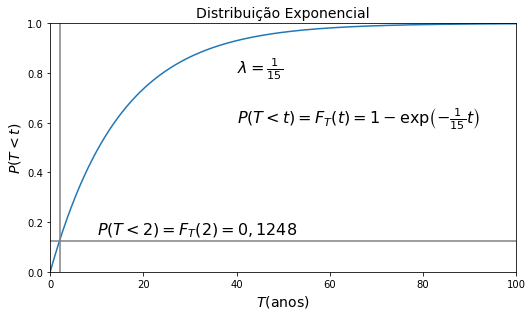

In [41]:
# Dados de entrada:
e_t = 15
lambdat = 1/15
t = np.linspace(0,100,1000)
ft = 1- np.exp(-lambdat * t)
# Gerar o gráfico de fT(t)
fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.plot(t, ft)
ax.set_ylabel(r'$P(T<t)$', fontsize=14)
ax.set_xlabel(r'$T$(anos)', fontsize=14)
ax.set_title('Distribuição Exponencial', fontsize=14)
ax.text(40, 0.8, r'$ \lambda = \frac{1}{15} $', fontsize = 16)
ax.text(40, 0.6, r'$ P(T<t) = F_T(t) = 1 - \exp\left({-\frac{1}{15}t}\right)$', fontsize = 16)
ax.text(10, 0.15, r'$ P(T<2) = F_T(2) = 0,1248$', fontsize = 16)
ax.axhline(y=0.1248, color="gray")
ax.axvline(x=2, color="gray")
ax.set_xlim(0,100)
ax.set_ylim(0,1.0)
fig.tight_layout()


* Probabilidade de que 2 ou mais entre os 4 geradores disponíveis estejam funcionando após 2 anos:

$$P(N \geq 2) = \sum_{x=2}^{4} \binom{4}{x} p^x q^{4-x} = 0,0716 + 0,3374 + 0,5867 = 0,9957$$

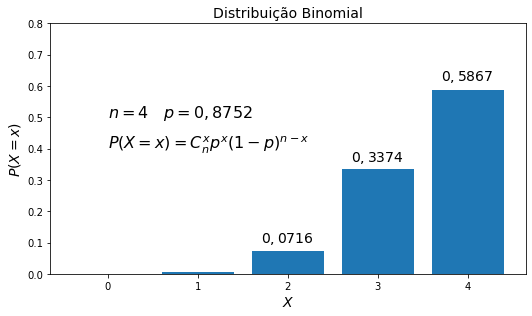

In [42]:
# Parâmetros n e p da distribuição binomial
n = 4
p = 0.8752
# Definindo os valores de x
x_values = list(range(n + 1))
# Lista com os valores de pmf para cada valor de x
dist = [binom.pmf(x, n, p) for x in x_values ]
# Gerando o gráfico da distribuição binomial para n = 5 e p = 0,10
fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.bar(x_values, dist)
ax.set_ylabel(r'$P(X=x)$', fontsize=14)
ax.set_xlabel(r'$X$', fontsize=14)
ax.set_title('Distribuição Binomial', fontsize=14)
ax.text(0, 0.5, r'$ n = 4 \quad p = 0,8752$', fontsize = 16)
ax.text(0, 0.4, r'$ P(X=x) = C_{n}^{x} p^x (1-p)^{n-x}$', fontsize = 16)
ax.text(1.7, 0.10, r'$0,0716$', fontsize=14)
ax.text(2.7, 0.36, r'$0,3374$', fontsize=14)
ax.text(3.7, 0.62, r'$0,5867$', fontsize=14)
ax.set_ylim(0, 0.80)
fig.tight_layout()

[Retornar à lista de distribuições de probabilidade](#section_32) 

### 3.2.8 - Distribuição Gama <a name="section_328"> </a>

* A distribuição de probabilidade Gama governa o tempo necessário  até a _k-ésima_ ocorrência de um evento que segue um __Processo de Poisson__.

* $T_k \leq t$ : $k$ ou mais eventos ocorrem no tempo t.

#### Função de distribuição de probabilidade acumulada para $T_k$:


$$ F_{T_k}(t) = \sum_{x=k}^{\infty}P(X_t=x) = 1 - P(T_k>t) = 1 - \sum_{x=0}^{k-1} \frac{(\nu t)^x}{x!}e^{-\nu t}$$


#### Função densidade de probabilidade da distribuição Gama:

$$ f_{T{k}}(t) = \frac{dF_{T_k}(t)}{dt} = \frac{\nu (\nu t)^{k-1}}{(k-1)!}e^{-\nu t}, \quad t>0$$

* A distribuição Gama com $k$ inteiro é conhecida como __distribuição de Erlang__.

* O tempo médio para a ocorrência do _k-esimo_ evento é:

$$E(T_k) = \frac{k}{v}$$

* A variância de $T_k$ é dada por:

$$Var(T_k) = \frac{k}{\nu^2}$$

* O nome distribuição Gama vem de que:

$$(k-1)! = \Gamma(k)$$

* Onde $\Gamma(k)$ é a função Gama de $k$, dada por:

$$\Gamma(k) = \int_{0}^{\infty}x^{k-1}e^{-x}dx, \quad k>0$$


### Exemplo 3.12 - Acidentes em um canal de navegação

<img src="./images3/acidente_canal.jpg" alt="Acidente em canal de navegação" style="width:474px"/>

Fonte: http://www.cargolaw.com/images/Tbone1.jpg

Acidentes em um canal de navegação ocorrem em média um a cada 6 meses. Ocorrência de acidentes em um canal de navegação podem ser modelados como um __Processo de Poisson__.

* Tempo até a ocorrência do primeiro acidente:

$$f_{T_1}(t) = \frac{1}{6}\exp{\left(-\frac{1}{6}t\right)}$$

* Tempo até a ocorrência do segundo acidente:

$$f_{T_2}(t) = \frac{1}{6} \left(\frac{1}{6}t\right)\exp{\left(-\frac{1}{6}t\right)}$$

* Tempo até a ocorrência do terceiro acidente:

$$f_{T_2}(t) = \frac{1}{6}\frac{1}{2!}\left(\frac{1}{6}t\right)^2\exp{\left(-\frac{1}{6}t\right)}$$

* Valores esperados de $T_K$:

1. $E(T_1) = 6 \rm{meses}$

2. $E(T_2) = 12 \rm{meses}$

3. $E(T_3) = 18 \rm{meses}$

O gráfico abaixo mostra as funções densidade de probabilidade para os tempos de ocorrência de 1, 2 e 3 acidentes em um canal de navegação.

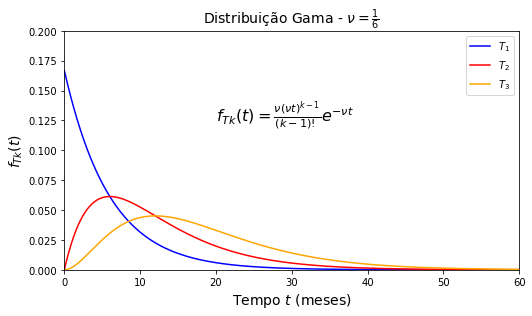

In [43]:
# Dados de entrada
nu = 1/6
fact2 = np.math.factorial(2)
t = np.linspace(0, 60, 1000)
# Cálculo das funções de densidade de probabilidade
ft1 = nu * np.exp(- nu * t)
ft2 = nu * nu * t * np.exp(- nu * t)
ft3 = nu * 1 / fact2 * (nu * t) ** 2 *np.exp(- nu * t)
# Gerar o gráfico com estas funções
fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.plot(t, ft1, color="blue", label="$T_1$")
ax.plot(t, ft2, color="red", label="$T_2$")
ax.plot(t, ft3, color="orange", label="$T_3$")
ax.set_xlabel(r'Tempo $t$ (meses)', fontsize=14)
ax.set_ylabel(r'$f_{Tk}(t)$', fontsize=14)
ax.set_title(r'Distribuição Gama - $\nu = \frac{1}{6}$', fontsize=14)
ax.text(20, 0.125, r'$ f_{T{k}}(t) = \frac{\nu (\nu t)^{k-1}}{(k-1)!}e^{-\nu t}$', fontsize = 16)
ax.set_xlim(0, 60)
ax.set_ylim(0, 0.20)
ax.legend(loc="upper right")
fig.tight_layout()

As curvas das funções de densidade de probabilidade acumulada para os tempos de ocorrência de 1, 2 e 3 acidentes são mostrados na figura abaixo.

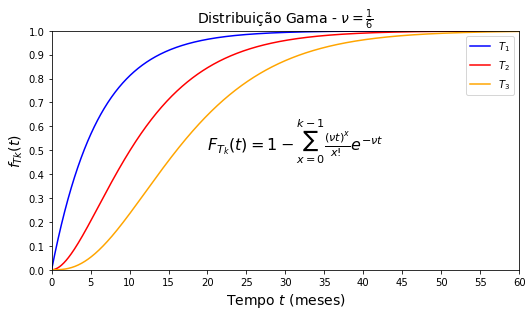

In [44]:
# Dados de entrada
nu = 1/6
fact2 = np.math.factorial(2)
t = np.linspace(0, 60, 1000)
# Cálculo das funções de densidade de probabilidade acumulada
fda_t1 = 1 - np.exp(- nu * t)
fda_t2 = 1 - (1 + nu * t) * np.exp(- nu * t)
fda_t3 = 1 - (1 + nu * t + (nu * t)**2 / fact2 ) * np.exp(- nu * t)
# Gerar o gráfico com estas funções
fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.plot(t, fda_t1, color="blue", label="$T_1$")
ax.plot(t, fda_t2, color="red", label="$T_2$")
ax.plot(t, fda_t3, color="orange", label="$T_3$")
ax.set_xlabel(r'Tempo $t$ (meses)', fontsize=14)
ax.set_ylabel(r'$f_{Tk}(t)$', fontsize=14)
ax.set_title(r'Distribuição Gama - $\nu = \frac{1}{6}$', fontsize=14)
ax.text(20, 0.5, r'$ F_{T_k}(t) = 1 - \sum_{x=0}^{k-1} \frac{(\nu t)^x}{x!}e^{-\nu t}$', fontsize = 16)
ax.set_xlim(0, 60)
ax.set_ylim(0, 1.00)
ax.set_xticks(np.arange(0, 65, 5))
ax.set_yticks(np.arange(0, 1.1, 0.1))
#ax.grid()
ax.legend(loc="upper right")
fig.tight_layout()

[Retornar à lista de distribuições de probabilidade](#section_32) 

### 3.2.9 - Distribuição Hipergeométrica <a name="section_329"> </a>

* Dada uma população com $N$ elementos.

* Nesta população $m$ elementos são defeituosos.

* Desta população é retirada uma amostra de $n$ elementos.

* A probabilidade de que nesta amostra de $n$ elementos existam $x$ elementos defeituosos é governada pela __Distribuição Hipergeométrica__.

* A função massa de probabilidade (FMP), $P(X=x)$, para a distribuição hipergeométrica é mostrada na figura abaixo.

<img src="./images3/hipergeometrica.jpg" alt="Distribuição Hipergeométrica" style="width:474px"/>

#### Exemplo 3.13 - Tetrapodes para molhe de proteção do porto

<img src="./images3/tetrapodes.jpg" alt="Tetrápodes" style="width:474px"/>

Canteiro de obras de fabricação de tetrápodes para um molhe de proteção a um porto:
* 100 corpos de prova retirados diariamente
* Critério de aceitação:
1. 10 corpos de prova são ensaiados
2. Se ao menos 9 alcançarem a resistência mínima à compressão o lote é aceito.

Pergunta: este critério é suficientemente rigoroso?

* Se $d\%$ dos corpos de prova são defeituosos, qual a probabilidade de um lote ruim ser detectado pelo critério?

__Solução:__

$$P(X>1) = 1 - P(X \leq 1) = 1 - [P(X=0) + P(X=1)] = 1 - \left[ \frac{\binom{100(1-d)}{10}}{\binom{100}{10}} + \frac{\binom{100(d)}{1}\binom{100(1-d)}{9}}{\binom{100}{10}} \right]$$

* Se $d=15\%$:

$$P(X>1) = 1 - \left[ \frac{\binom{85}{10}}{\binom{100}{10}} + \frac{\binom{15}{1}\binom{85}{9}}{\binom{100}{10}} \right] = 1 - [0,1808+0,3568]=0,4624$$

Neste caso a chance de aparecer mais de um corpo de prova defeituoso em 10 é de $46,24\%$, e o critério de aceitação é rigoroso o suficiente.

In [45]:
# É preciso importar o módulo: scipy.special como sp
# Caso 1: d=15%
d= 0.15
px0 = sp.binom(100*(1-d), 10) / sp.binom(100, 10)
px1 =  sp.binom(100*d, 1) * sp.binom(100*(1-d), 9) / sp.binom(100, 10)
pxm1 = 1 - (px0 + px1)
print("d = {0:0.2f}%".format(100*d))
print("P(X=0)={0:0.4f}".format(px0))
print("P(X=1)={0:0.4f}".format(px1))
print("P(X>1)={0:0.4f}".format(pxm1))

d = 15.00%
P(X=0)=0.1808
P(X=1)=0.3568
P(X>1)=0.4625


* Se $d=2\%$:

$$P(X>1) = 1 - \left[ \frac{\binom{98}{10}}{\binom{100}{10}} + \frac{\binom{2}{1}\binom{98}{9}}{\binom{100}{10}} \right] = 1 - [0,8091+0,1818]=0,0091$$

Neste caso a chance de aparecer mais de um corpo de prova defeituoso em 10 é de apenas $0,91\%$, e o critério de aceitação não é suficientemente rigoroso.

In [46]:
# É preciso importar o módulo: scipy.special como sp
# Caso 2: d=2%
d= 0.02
px0 = sp.binom(100*(1-d), 10) / sp.binom(100, 10)
px1 =  sp.binom(100*d, 1) * sp.binom(100*(1-d), 9) / sp.binom(100, 10)
pxm1 = 1 - (px0 + px1)
print("d = {0:0.2f}%".format(100*d))
print("P(X=0)={0:0.4f}".format(px0))
print("P(X=1)={0:0.4f}".format(px1))
print("P(X>1)={0:0.4f}".format(pxm1))

d = 2.00%
P(X=0)=0.8091
P(X=1)=0.1818
P(X>1)=0.0091


[Retornar à lista de distribuições de probabilidade](#section_32) 

### 3.2.10 - Distribuição Beta <a name="section_3210"> </a>

* A distribuição Beta é apropriada para uma variável aleatória cujos valores possíveis estão confinados entre os limites a e b.

* A função densidade de probabilidade da distribuição Beta é dada por:

$$f_X(x) = \frac{1}{B(q,r)} \frac{(x-a)^{q-1}(b-x)^{r-1}}{(b-a)^{q+r-1}}, \quad a \leq x \leq b$$

$$f_X(x) = 0, \text{para outros valores de} x$$

Onde:

$a$ é o limite inferior da variável $x$;  
$b$ é o limite superior da variável $x$;  
$q$ e $r$ são os parâmetros da distribuição;  
$B(q,r)$ é a função Beta, dada por:  

$$B(q,r) = \int_{0}^{1}x^{q-1}(x-1)^{r-1}dx$$

* A função Beta está relacionada com a função Gama através da equação:

$$ B(q,r) = \frac{\Gamma(q)\Gamma(r)}{\Gamma(q+r)}$$

* A função densidade de probabilidade para a distribuição Beta padrão é dada por:

$$f_X(x) = \frac{1}{B(q,r)} x^{q-1}(1-x)^{r-1}, \quad 0 \leq x \le 1$$

$$f_X(x) = 0, \text{para outros valores de} x$$

A figura abaixo mostra o gráfico da função densidade de probabilidade da função Beta padrão para $0 \leq x \leq 1$, para diversos valores dos parâmetros, $q$ e $r$.

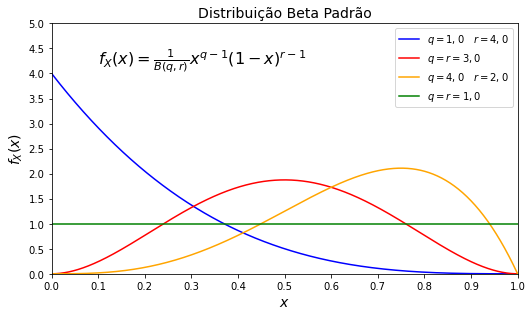

In [47]:
# Dados de entrada
a = 0
b = 1
loc = 0
scale = 1
x = np.arange (0, 1.001, 0.001)
q =  1
r = 4
y1 = beta.pdf(x, q, r, loc, scale)
q =  3
r = 3
y2 = beta.pdf(x, q, r, loc, scale)
q =  4
r = 2
y3 = beta.pdf(x, q, r, loc, scale)
q =  1
r = 1
y4 = beta.pdf(x, q, r, loc, scale)
# Gerar o gráfico com estas funções
fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.plot(x, y1, color="blue", label="$q = 1,0 \quad r = 4,0$")
ax.plot(x, y2, color="red", label="$q = r = 3,0$")
ax.plot(x, y3, color="orange", label="$q = 4,0 \quad r = 2,0$")
ax.plot(x, y4, color="green", label="$q = r = 1,0$")
ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$f_{X}(x)$', fontsize=14)
ax.set_title(r'Distribuição Beta Padrão', fontsize=14)
ax.text(0.1, 4.2, r'$ f_X(x) = \frac{1}{B(q,r)} x^{q-1}(1-x)^{r-1}$', fontsize = 16)
ax.set_xlim(0, 1.00)
ax.set_ylim(0, 4.00)
ax.set_xticks(np.arange(0, 1.1, 0.10))
ax.set_yticks(np.arange(0, 5.5, 0.5))
#ax.grid()
ax.legend(loc="upper right")
fig.tight_layout()

 * O cálculo da __probabilidade acumulada__ na distribuição Beta padrão pode ser realizado através da expressão:
 
 $$F_X(x) = \frac{B_x(q,r)}{B(q,r)}$$,
 
 
Onde $B_x(q,r)$ a chamada  __função Beta Incompleta__, dada por:
 
 $$B_x(q,r) = \int_0^x y^{q-1}(1-y)^{r-1}dy, \quad 0 \leq x \leq 1$$
 
Por exemplo: para $q = 4$, $r = 2$ e $x =  0,68619$ a probabilidade acumulada vale $P(X<x) = 0,50$.

In [48]:
x = 0.686190
q = 4
r = 2
fda_x = sp.betainc(q,r,x) 
print("FDA Beta de x ={0:0.4f}: P(X<x) = {1:0.4f}".format(x,fda_x))

FDA Beta de x =0.6862: P(X<x) = 0.5000


* Média da distribuição Beta:
    
$$\mu_x = a + \frac{q}{q+r}(b-a)$$

* Variância da distribuição Beta:

$$\sigma_x^2 = \frac{qr}{(q+r)^2(q+r+1)}(b-a)^2$$

* Cálculo de probabilidade:

$$P(x_1 \leq x \leq x_2) = \frac{1}{B(q,r)}[B_v(q,r) - B_u(q,r)]$$

onde:

$$u= \frac{(x_1 - a)}{(b-a)} \quad e \quad v= \frac{(x_2 - a)}{(b-a)}$$

sendo, $B_u(q,r)$ e $B_v(q,r)$ as funções Beta Incompletas de $u$ e de $v$, respectivamente.

#### Exemplo 3.14 - Duração de atividade em obra portuária

<img src="./images3/obra_porto.jpg" alt="Estacas porto" style="width:474px"/>

* Duração de uma atividade de construção em uma obra portuária:
* Duração mínima = 5 dias
* Duração máxima = 10 dias
* Duração esperada = 7 dias
* Coeficiente de variação = 10%
* Qual a probabilidade de a atividade ser concluída em até 9 dias?

__Solução:__

* Parâmetros:

$$ \mu_x = 5 + \frac{q}{q+r}(10 - 5) = 7$$

$$ \sigma_x^2 = \frac{qr}{(q+r)^2(q+r+1)}(10-5)^2 = (0,10.7)^2$$

Os parâmetros $q$ e $r$ podem ser determinados através da solução do sistema de equações não lineares acima.

In [49]:
def equations(p):
    x, y = p
    return (5+x/(x+y)*5-7, x*y/((x+y)**2*(x+y+1))*25-0.49)

q, r =  fsolve(equations, (1, 1))

print("q = {0:0.2f} e r = {1:0.2f}".format(q,r))

q = 4.50 e r = 6.75


* Cálculo da probabilidade de que $T \leq 9$:

$$u = 0$$

$$v = \frac{(9-5)}{(10-5)} = 0,80$$

$$P(T \leq 9) = \frac{B_v(4,50; 6,75)}{B(4,50; 6,75)}=0,9982$$



In [50]:
u=0.00
v=(9-5)/(10-5)
fda=sp.betainc(q,r,v)
print("v = {0:0.2f} e P(T<=9) = {1:0.4f}".format(v,fda))

v = 0.80 e P(T<=9) = 0.9982


* Gráfico da densidade de probabilidade do tempo de execução da atividade $T$:

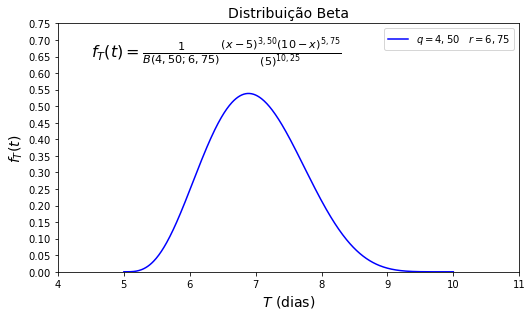

In [51]:
# Dados de entrada
a = 5
b = 10
x = np.arange (5, 10.01, 0.01)
q =  4.50
r = 6.75
loc = a
scale = (b-a) 
y = beta.pdf(x, q, r, loc, scale) 
# Gerar o gráfico com estas funções
fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.plot(x, y, color="blue", label="$q = 4,50 \quad r = 6,75$")
ax.set_xlabel(r'$T$ (dias)', fontsize=14)
ax.set_ylabel(r'$f_{T}(t)$', fontsize=14)
ax.set_title(r'Distribuição Beta', fontsize=14)
ax.text(4.5, 0.65, r'$ f_T(t) = \frac{1}{B(4,50;6,75)} \frac{(x-5)^{3,50}(10-x)^{5,75}}{(5)^{10,25}}$', fontsize = 16)
ax.set_xlim(4, 11.00)
ax.set_ylim(0, 0.75)
ax.set_xticks(np.arange(4, 12, 1))
ax.set_yticks(np.arange(0, 0.80, 0.05))
#ax.grid()
ax.legend(loc="upper right")
fig.tight_layout()

[Retornar à lista de distribuições de probabilidade](#section_32) 

## __Bibliografia__

* __Livros__
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering planning and design. Volume I:  basic principles. New  York, John Wiley & Sons, 1975.
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering planning and pesign. Volume II: decision, risk and reliability. New  York, John Wiley & Sons, 1984.
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.
* BECK, A. T. Confiabilidade e segurança das  estruturas. Rio de Janeiro, Elsevier, 2019.
* HALDAR, A. MAHADEVAN, S. Probability, reliability, and statistical methods in engineering design. New York, Wiley, 2000.
* MELCHERS, R.E., BECK, A. T.; Structural reliability analysis and prediction. 3rd ed. John Wiley and Sons, 2018, 514p.

[Voltar ao início do item 3.2](#section_32)